In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X  = pd.read_csv('dump.position',header=None)

In [3]:
X.head(30)

,0
0,ITEM: TIMESTEP
1,0
2,ITEM: NUMBER OF ATOMS
3,15
4,ITEM: BOX BOUNDS ff fm pp
5,-4.1000000000000000e+01 4.1000000000000000e+01
6,0.0000000000000000e+00 2.0000000000000000e+02
7,-2.5000000000000000e-01 2.5000000000000000e-01
8,ITEM: ATOMS id x y
9,42464 -0.5 140.866


In [4]:
atom_id,x,y = map(float,X.iloc[9][0].strip().split())

In [5]:
atom_id,x,y

(42464.0, -0.5, 140.866)

In [6]:
X.shape[0]

14592

In [7]:
# Creating df
df = {}
for i in range(42463,42478,1):
    df[i] = {}
    
for i in range(0,X.shape[0],24):
    time = int(X.iloc[i+1][0])*(5*10**-5)
    for j in range(i+9,i+24):
        sphere_id,x,y = map(float, X.iloc[j][0].strip().split())
        df[int(sphere_id)][time] = [x,y]
data = pd.DataFrame(df)
data.index.name = 'Time'

In [8]:
data

,42463,42464,42465,42466,42467,42468,42469,42470,42471,42472,42473,42474,42475,42476,42477
Time,,,,,,,,,,,,,,,
0.00,"[0.0, 140.0]","[-0.5, 140.866]","[0.5, 140.866]","[-1.0, 141.732]","[0.0, 141.732]","[1.0, 141.732]","[-1.5, 142.598]","[-0.5, 142.598]","[0.5, 142.598]","[1.5, 142.598]","[-2.0, 143.464]","[-1.0, 143.464]","[0.0, 143.464]","[1.0, 143.464]","[2.0, 143.464]"
0.05,"[-2.10335e-19, 139.999]","[-0.5, 140.865]","[0.5, 140.865]","[-1.0, 141.731]","[-1.67404e-19, 141.731]","[1.0, 141.731]","[-1.5, 142.597]","[-0.5, 142.597]","[0.5, 142.597]","[1.5, 142.597]","[-2.0, 143.463]","[-1.0, 143.463]","[-1.24474e-19, 143.463]","[1.0, 143.463]","[2.0, 143.463]"
0.10,"[-8.41326e-19, 139.995]","[-0.5, 140.861]","[0.5, 140.861]","[-1.0, 141.727]","[-6.69603e-19, 141.727]","[1.0, 141.727]","[-1.5, 142.593]","[-0.5, 142.593]","[0.5, 142.593]","[1.5, 142.593]","[-2.0, 143.459]","[-1.0, 143.459]","[-4.97881e-19, 143.459]","[1.0, 143.459]","[2.0, 143.459]"
0.15,"[-1.89297e-18, 139.989]","[-0.5, 140.855]","[0.5, 140.855]","[-1.0, 141.721]","[-1.5066e-18, 141.721]","[1.0, 141.721]","[-1.5, 142.587]","[-0.5, 142.587]","[0.5, 142.587]","[1.5, 142.587]","[-2.0, 143.453]","[-1.0, 143.453]","[-1.12022e-18, 143.453]","[1.0, 143.453]","[2.0, 143.453]"
0.20,"[-3.36527e-18, 139.98]","[-0.5, 140.846]","[0.5, 140.846]","[-1.0, 141.712]","[-2.67838e-18, 141.712]","[1.0, 141.712]","[-1.5, 142.578]","[-0.5, 142.578]","[0.5, 142.578]","[1.5, 142.578]","[-2.0, 143.444]","[-1.0, 143.444]","[-1.99149e-18, 143.444]","[1.0, 143.444]","[2.0, 143.444]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30.15,"[0.217919, 4.71393]","[-0.389032, 5.50865]","[0.602707, 5.63692]","[-0.995984, 6.30336]","[-0.00424434, 6.43163]","[0.987495, 6.5599]","[-1.60293, 7.09807]","[-0.611196, 7.22634]","[0.380544, 7.35461]","[1.37228, 7.48288]","[-2.20989, 7.89278]","[-1.21815, 8.02105]","[-0.226408, 8.14932]","[0.765332, 8.27759]","[1.75707, 8.40586]"
30.20,"[0.219473, 4.71297]","[-0.38759, 5.5076]","[0.604132, 5.63601]","[-0.994653, 6.30222]","[-0.0029314, 6.43063]","[0.98879, 6.55904]","[-1.60172, 7.09685]","[-0.609994, 7.22526]","[0.381727, 7.35367]","[1.37345, 7.48208]","[-2.20878, 7.89148]","[-1.21706, 8.01988]","[-0.225336, 8.14829]","[0.766385, 8.2767]","[1.75811, 8.40511]"
30.25,"[0.220972, 4.71242]","[-0.386169, 5.50699]","[0.60554, 5.63549]","[-0.99331, 6.30155]","[-0.00160141, 6.43006]","[0.990107, 6.55856]","[-1.60045, 7.09612]","[-0.608742, 7.22462]","[0.382966, 7.35313]","[1.37467, 7.48164]","[-2.20759, 7.89068]","[-1.21588, 8.01919]","[-0.224175, 8.1477]","[0.767534, 8.2762]","[1.75924, 8.40471]"


In [9]:
time_Arr = []
x_Arr = []
y_Arr = []
for i in data.index:
    instance  = data.loc[i]
    time_Arr.append(i)
    center_x = (instance[42463][0]+instance[42473][0]+instance[42477][0])/3
    x_Arr.append(center_x)
    center_y = (instance[42463][1]+instance[42473][1]+instance[42477][1])/3
    y_Arr.append(center_y)


centroid_df =pd.DataFrame({"time":time_Arr,"x":x_Arr,"y":y_Arr})

In [10]:
centroid_df

,time,x,y
0,0.00,0.000000,142.309333
1,0.05,0.000000,142.308333
2,0.10,0.000000,142.304333
3,0.15,0.000000,142.298333
4,0.20,0.000000,142.289333
...,...,...,...
603,30.15,-0.078300,7.004190
604,30.20,-0.077066,7.003187
605,30.25,-0.075793,7.002603
606,30.30,-0.074540,7.002473


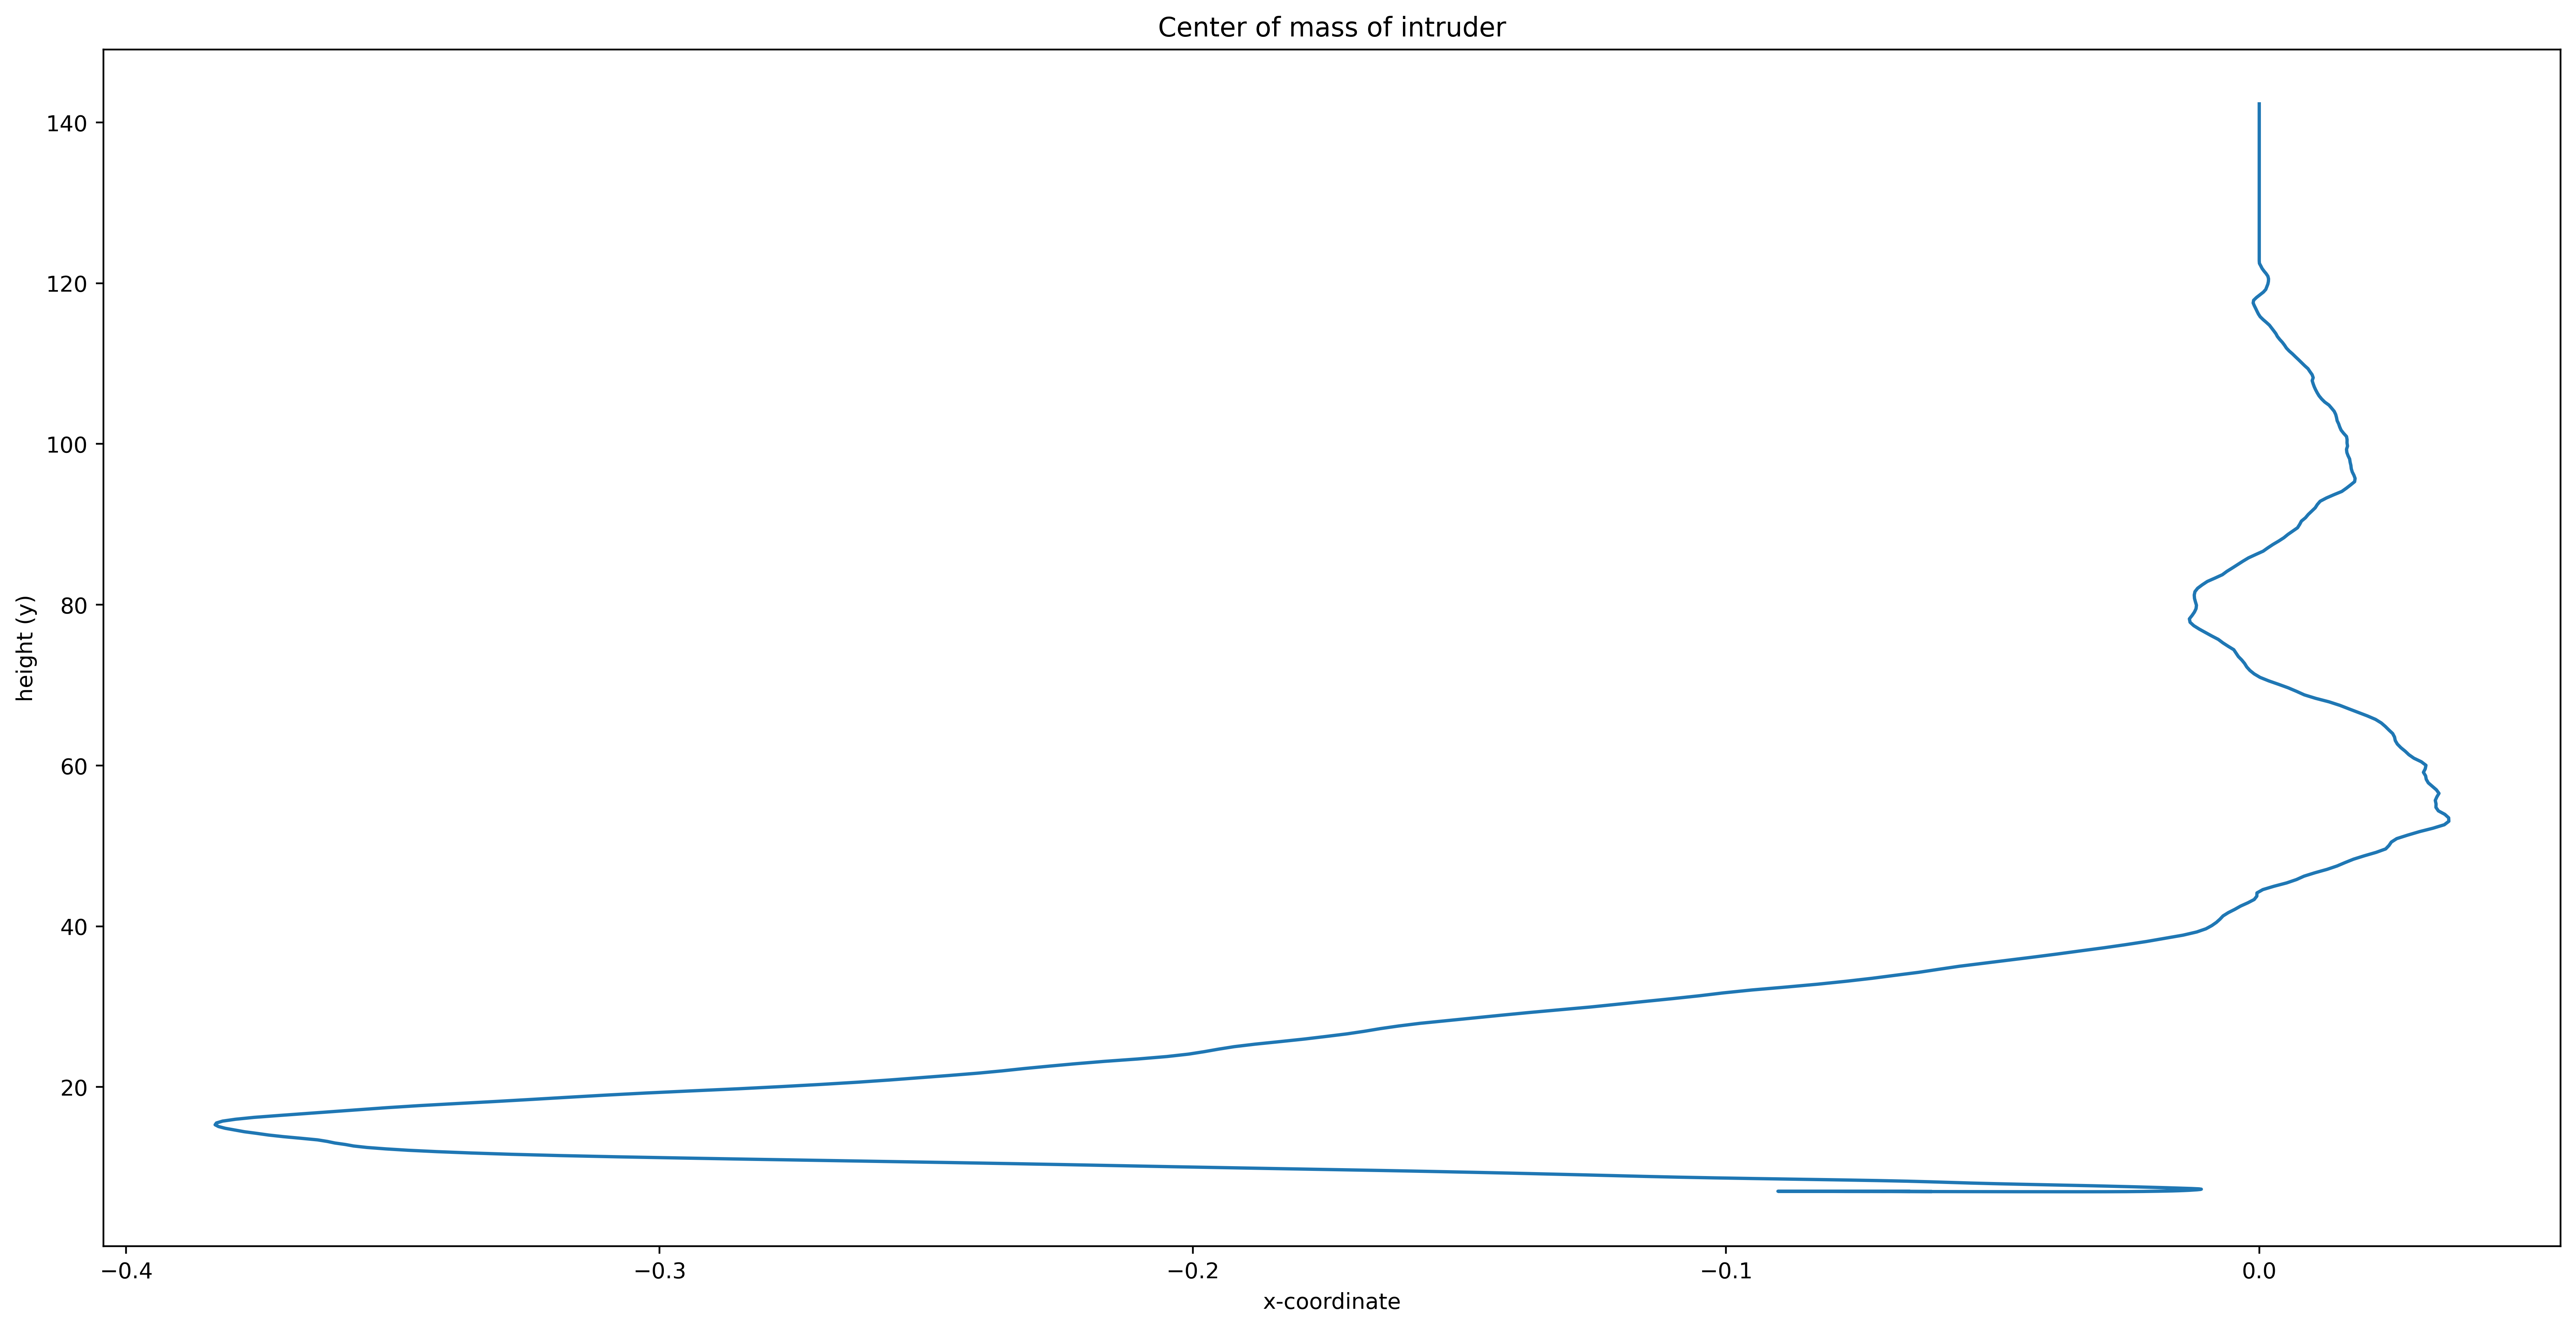

In [11]:
# y Vs x
plt.figure(figsize=(20,10),dpi=400)
plt.plot(x_Arr,y_Arr)
plt.ylabel('height (y)')
plt.xlabel('x-coordinate')
plt.title('Center of mass of intruder')
plt.savefig('intruder y Vs x.jpg',bbox_inches='tight')
plt.show()

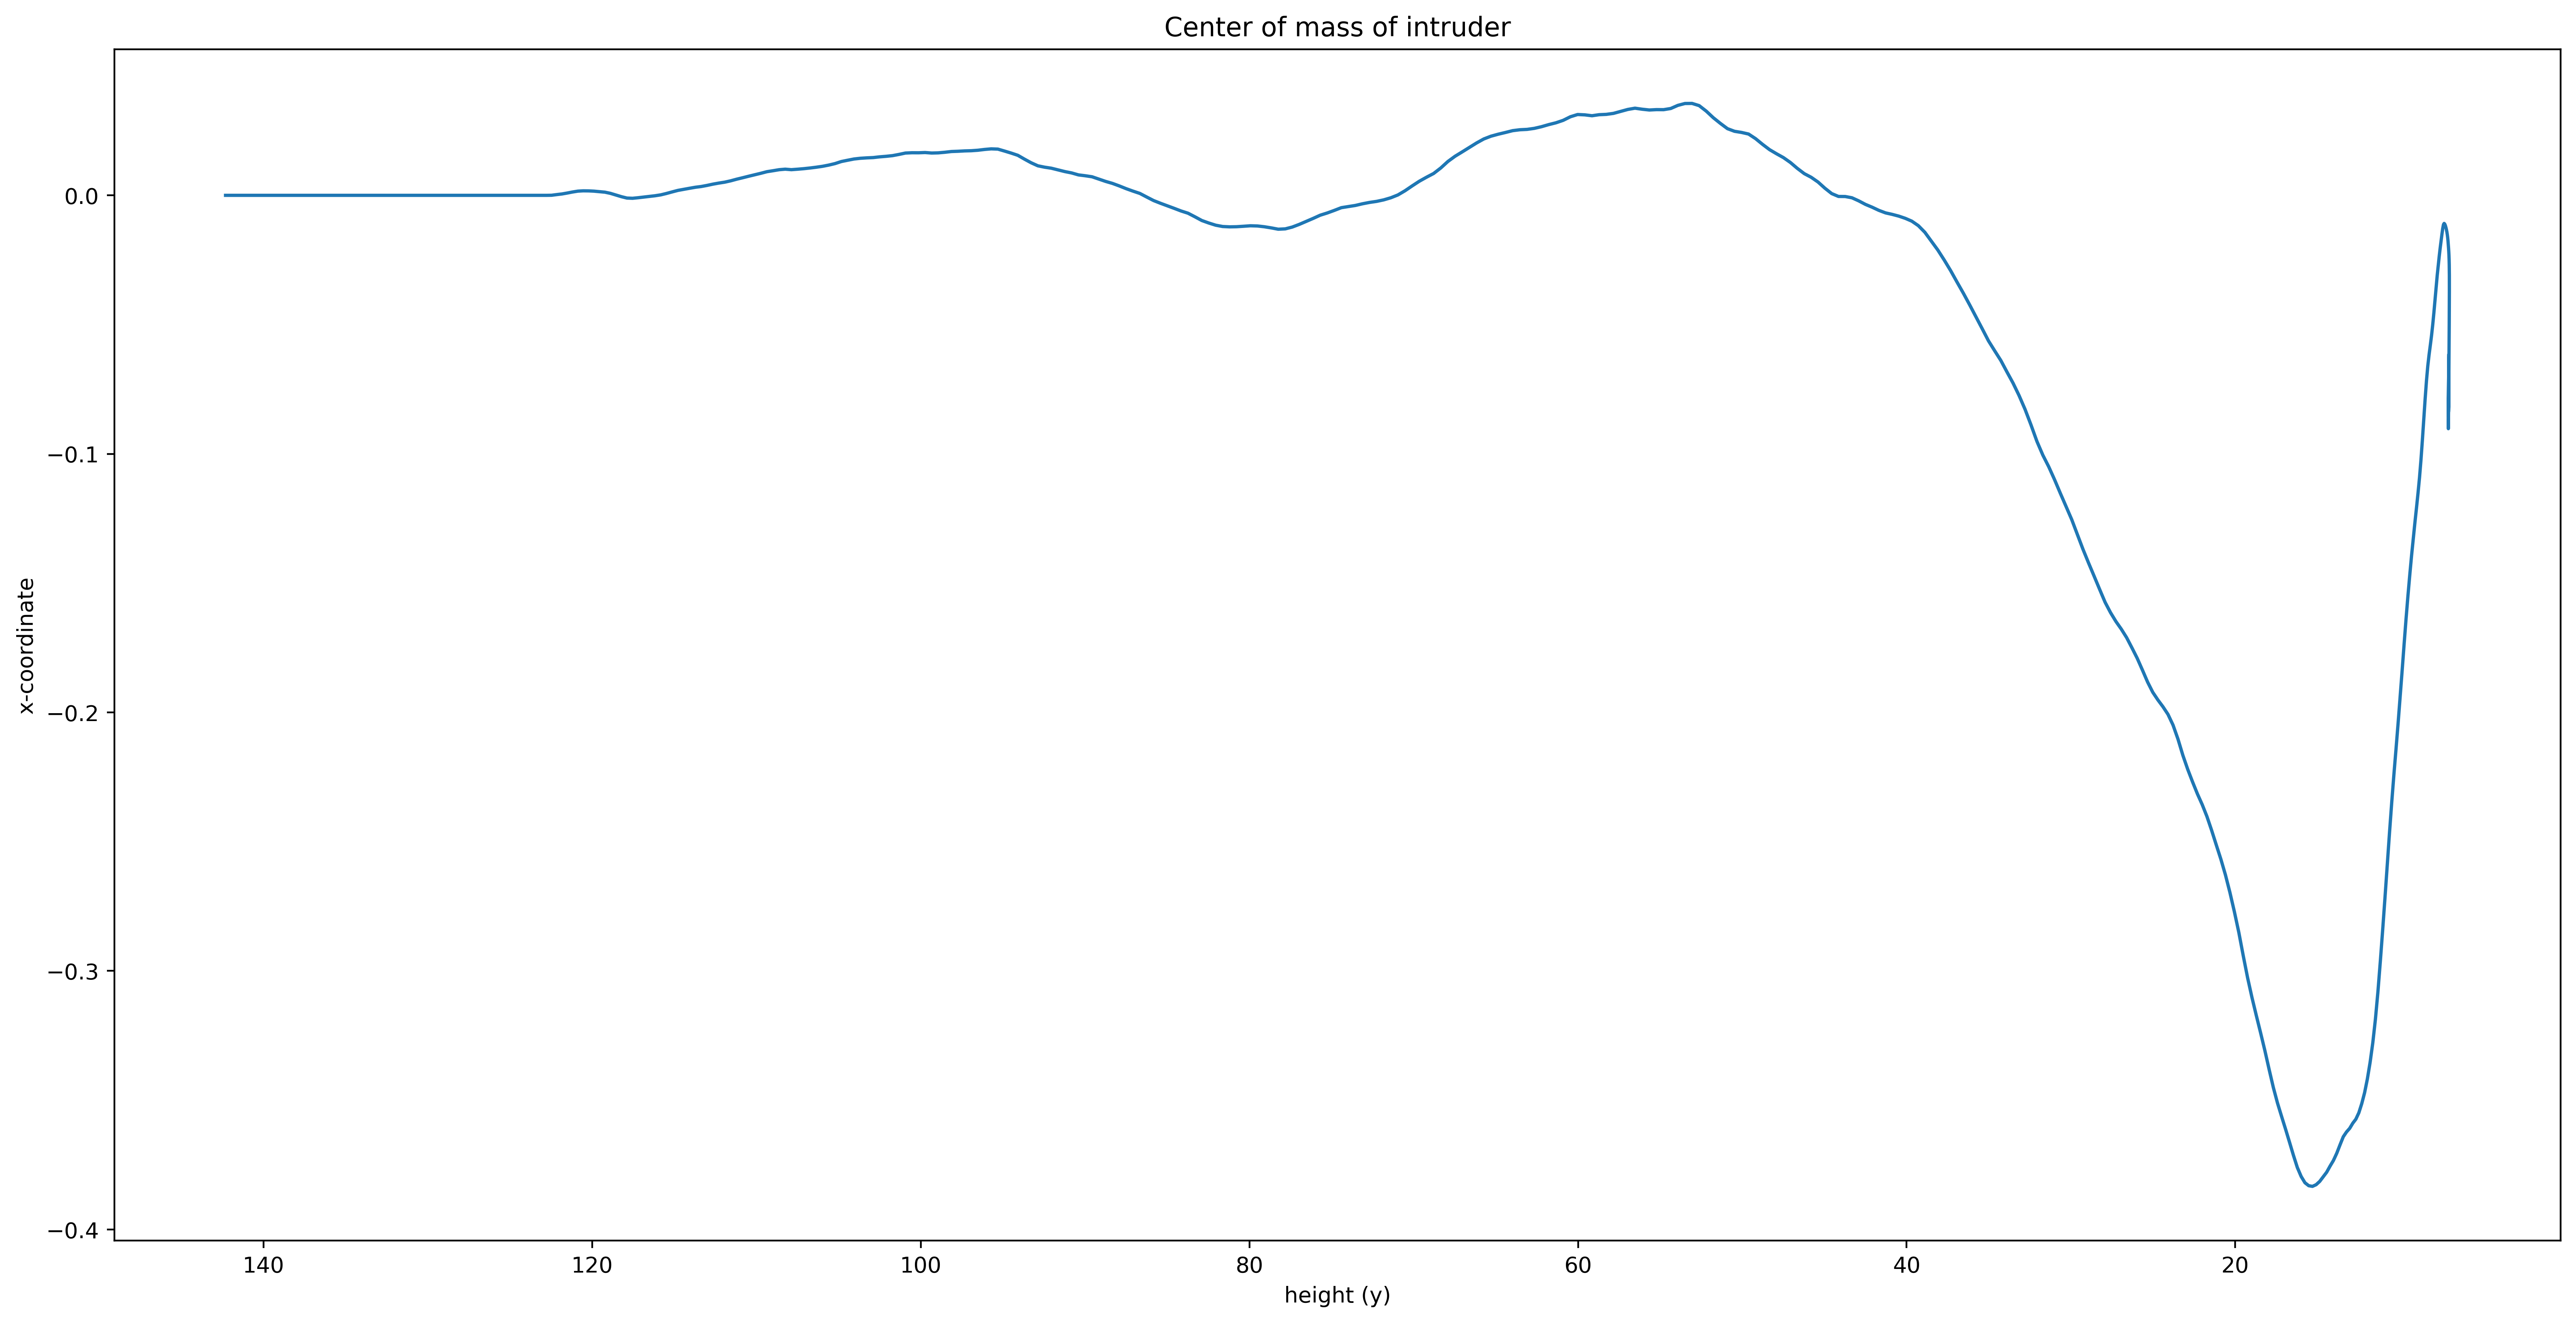

In [12]:
# x Vs y
plt.figure(figsize=(20,10),dpi=400)
plt.gca().invert_xaxis()
plt.plot(y_Arr,x_Arr)
plt.xlabel('height (y)')
plt.ylabel('x-coordinate')
plt.title('Center of mass of intruder')
plt.savefig('intruder x Vs y.jpg',bbox_inches='tight')
plt.show()

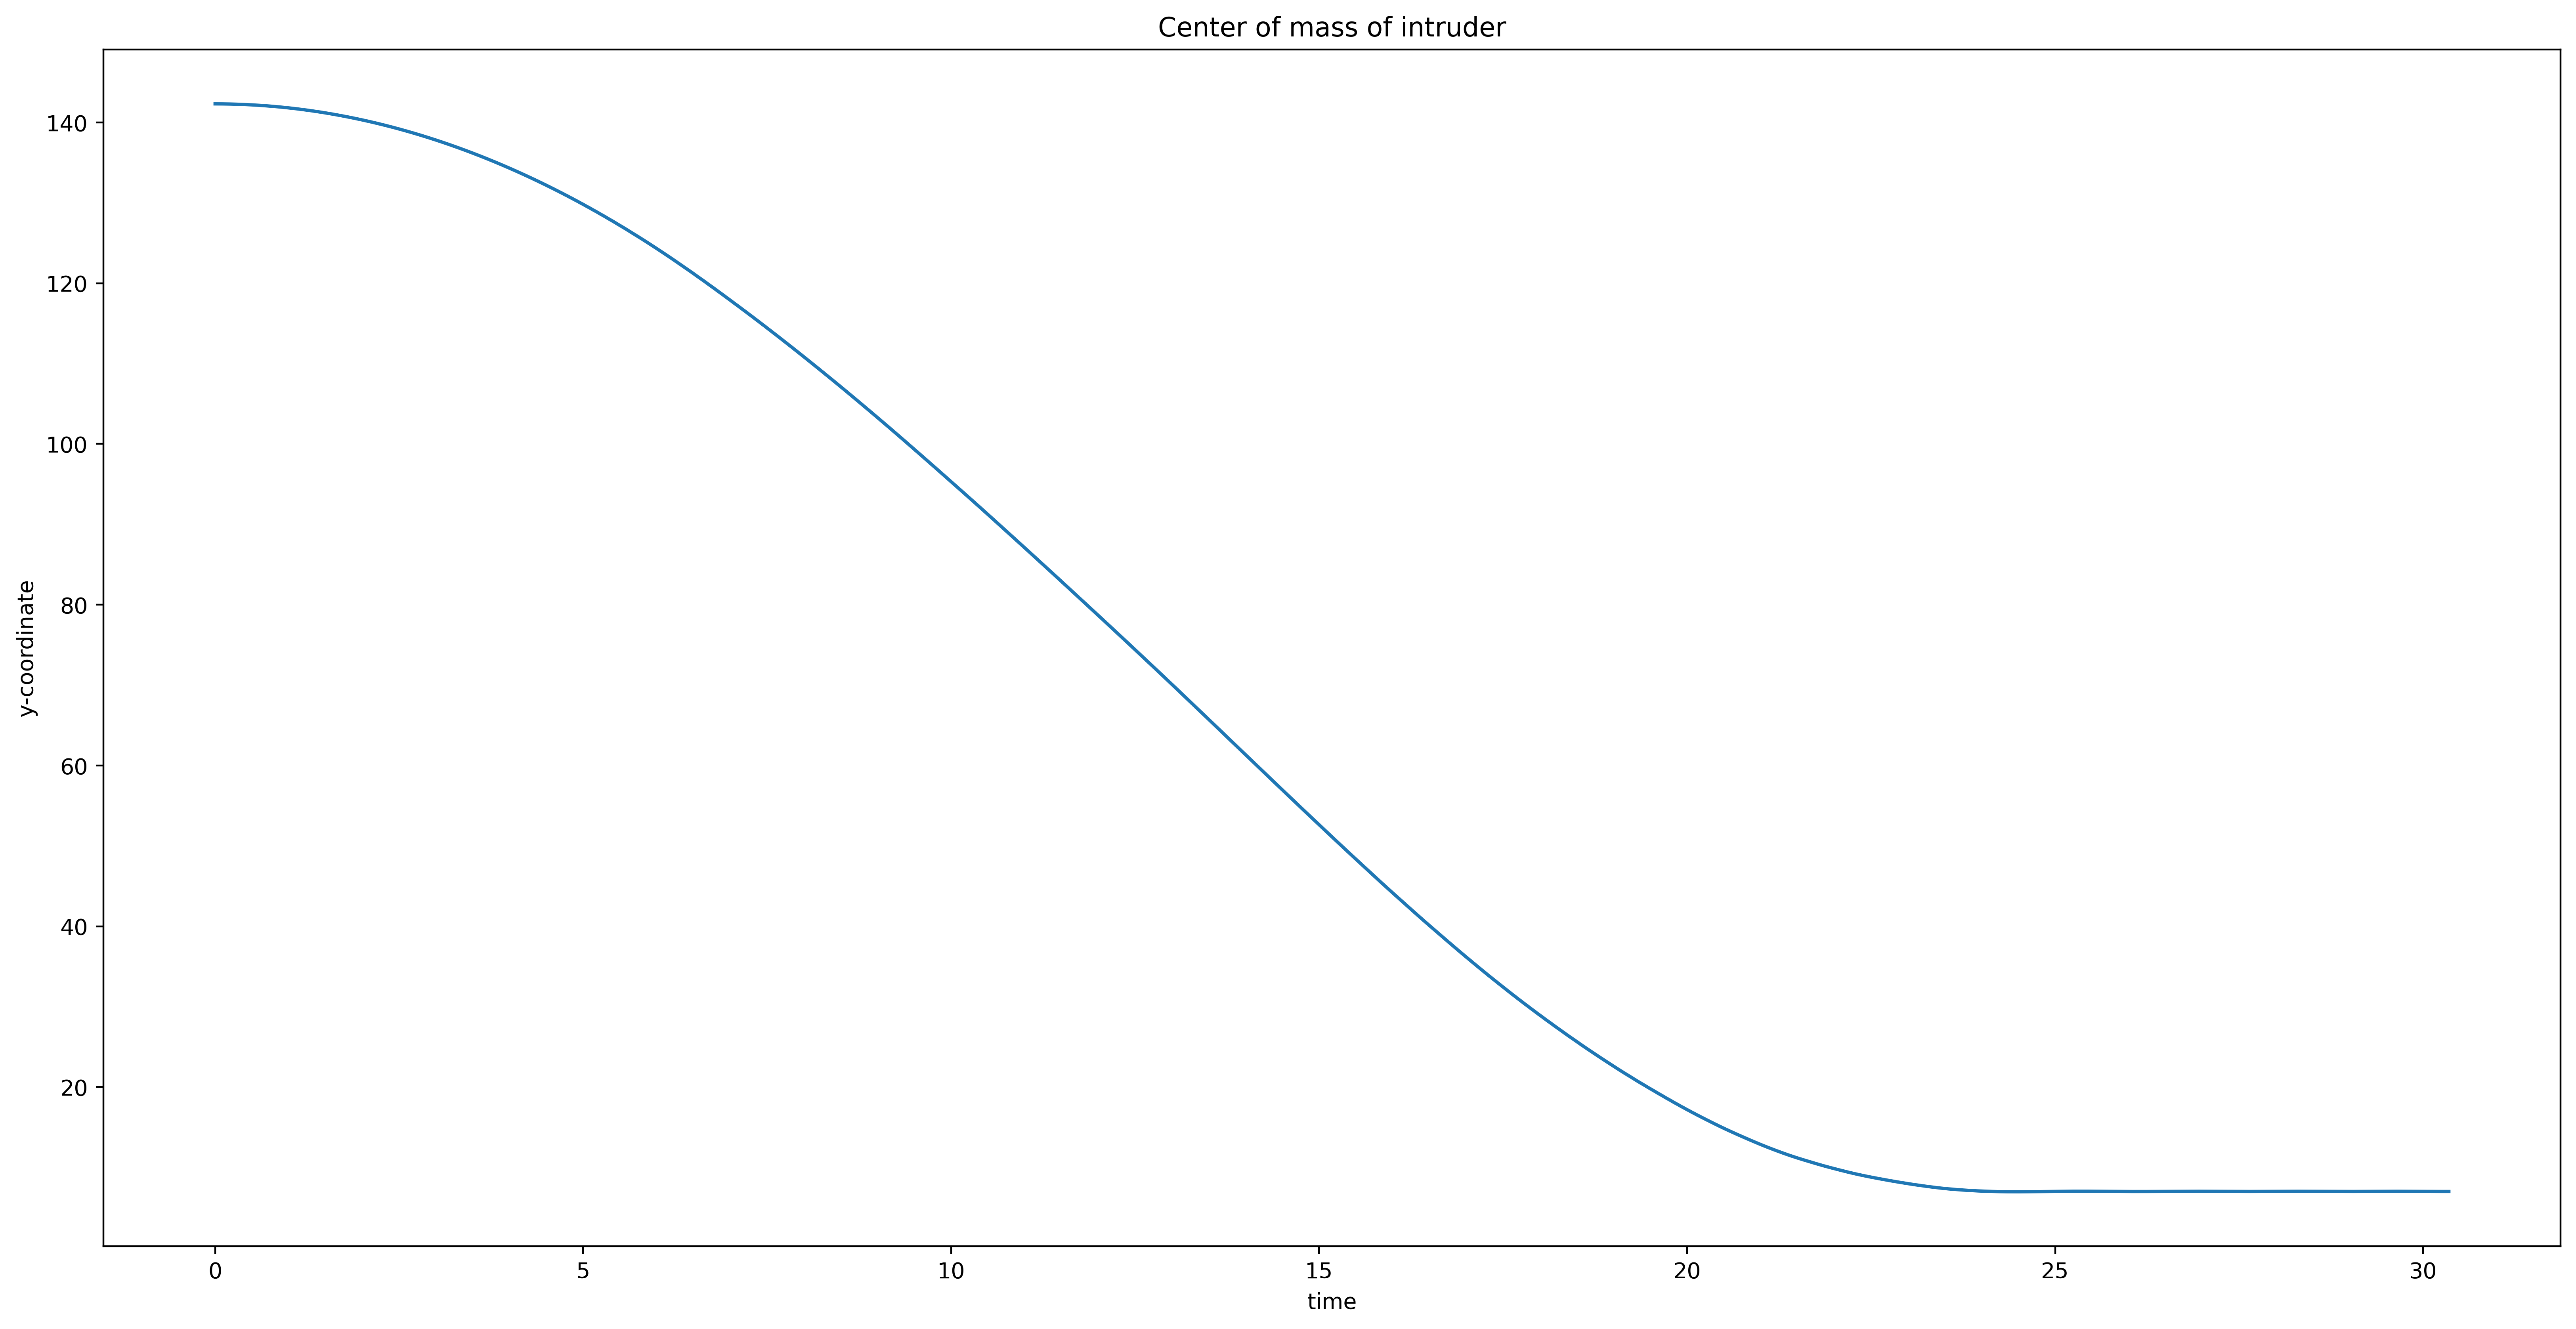

In [13]:
# y Vs time
plt.figure(figsize=(20,10),dpi=400)
plt.plot(time_Arr,y_Arr)
plt.xlabel('time')
plt.ylabel('y-coordinate')
plt.title('Center of mass of intruder')
plt.savefig('intruder y Vs time.jpg',bbox_inches='tight')
plt.show()

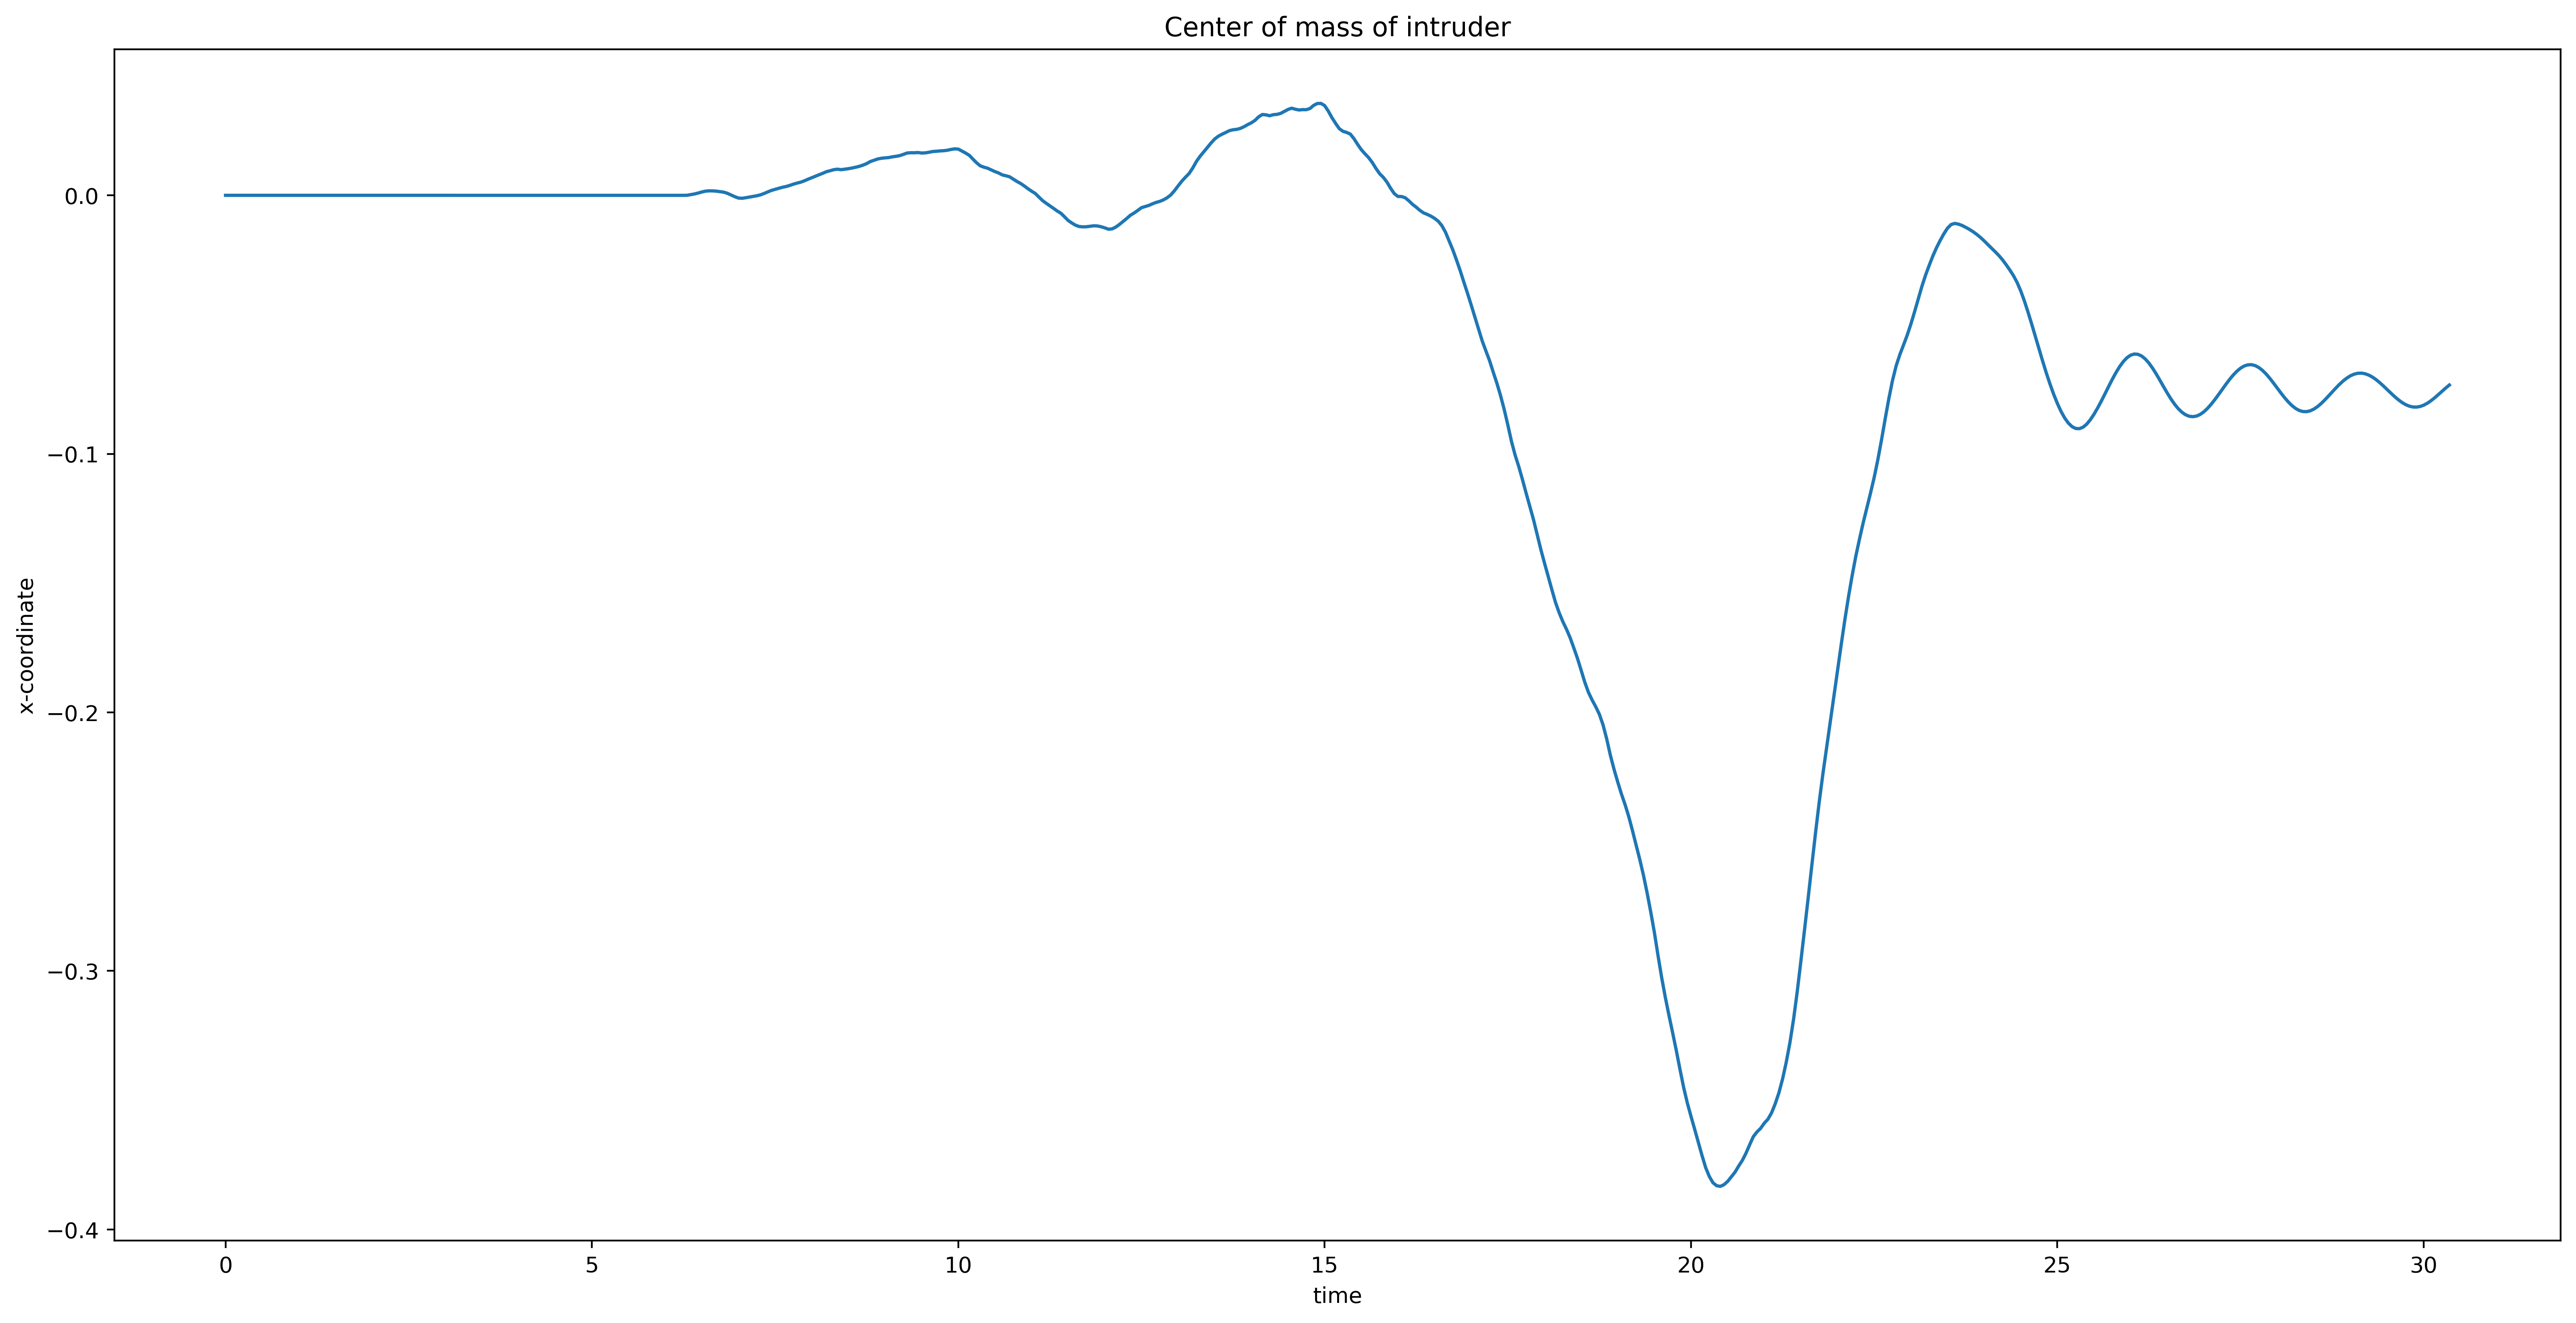

In [14]:
# x Vs time
plt.figure(figsize=(20,10),dpi=400)
plt.plot(time_Arr,x_Arr)
plt.xlabel('time')
plt.ylabel('x-coordinate')
plt.title('Center of mass of intruder')
plt.savefig('intruder x Vs time.jpg',bbox_inches='tight')
plt.show()

## For orientation for intruder

In [19]:
orientation = []
for i in data.index:
    instance  = data.loc[i]
    rad =  (instance[42477][1]-instance[42473][1])/(instance[42477][0]-instance[42473][0])
    theta = np.arctan(rad)
    orientation.append(theta)
    
orientation_df =pd.DataFrame({"time":time_Arr,"orientation":orientation})

In [21]:
orientation_df

,time,orientation
0,0.00,0.000000
1,0.05,0.000000
2,0.10,0.000000
3,0.15,0.000000
4,0.20,0.000000
...,...,...
603,30.15,0.128624
604,30.20,0.128763
605,30.25,0.128864
606,30.30,0.128897


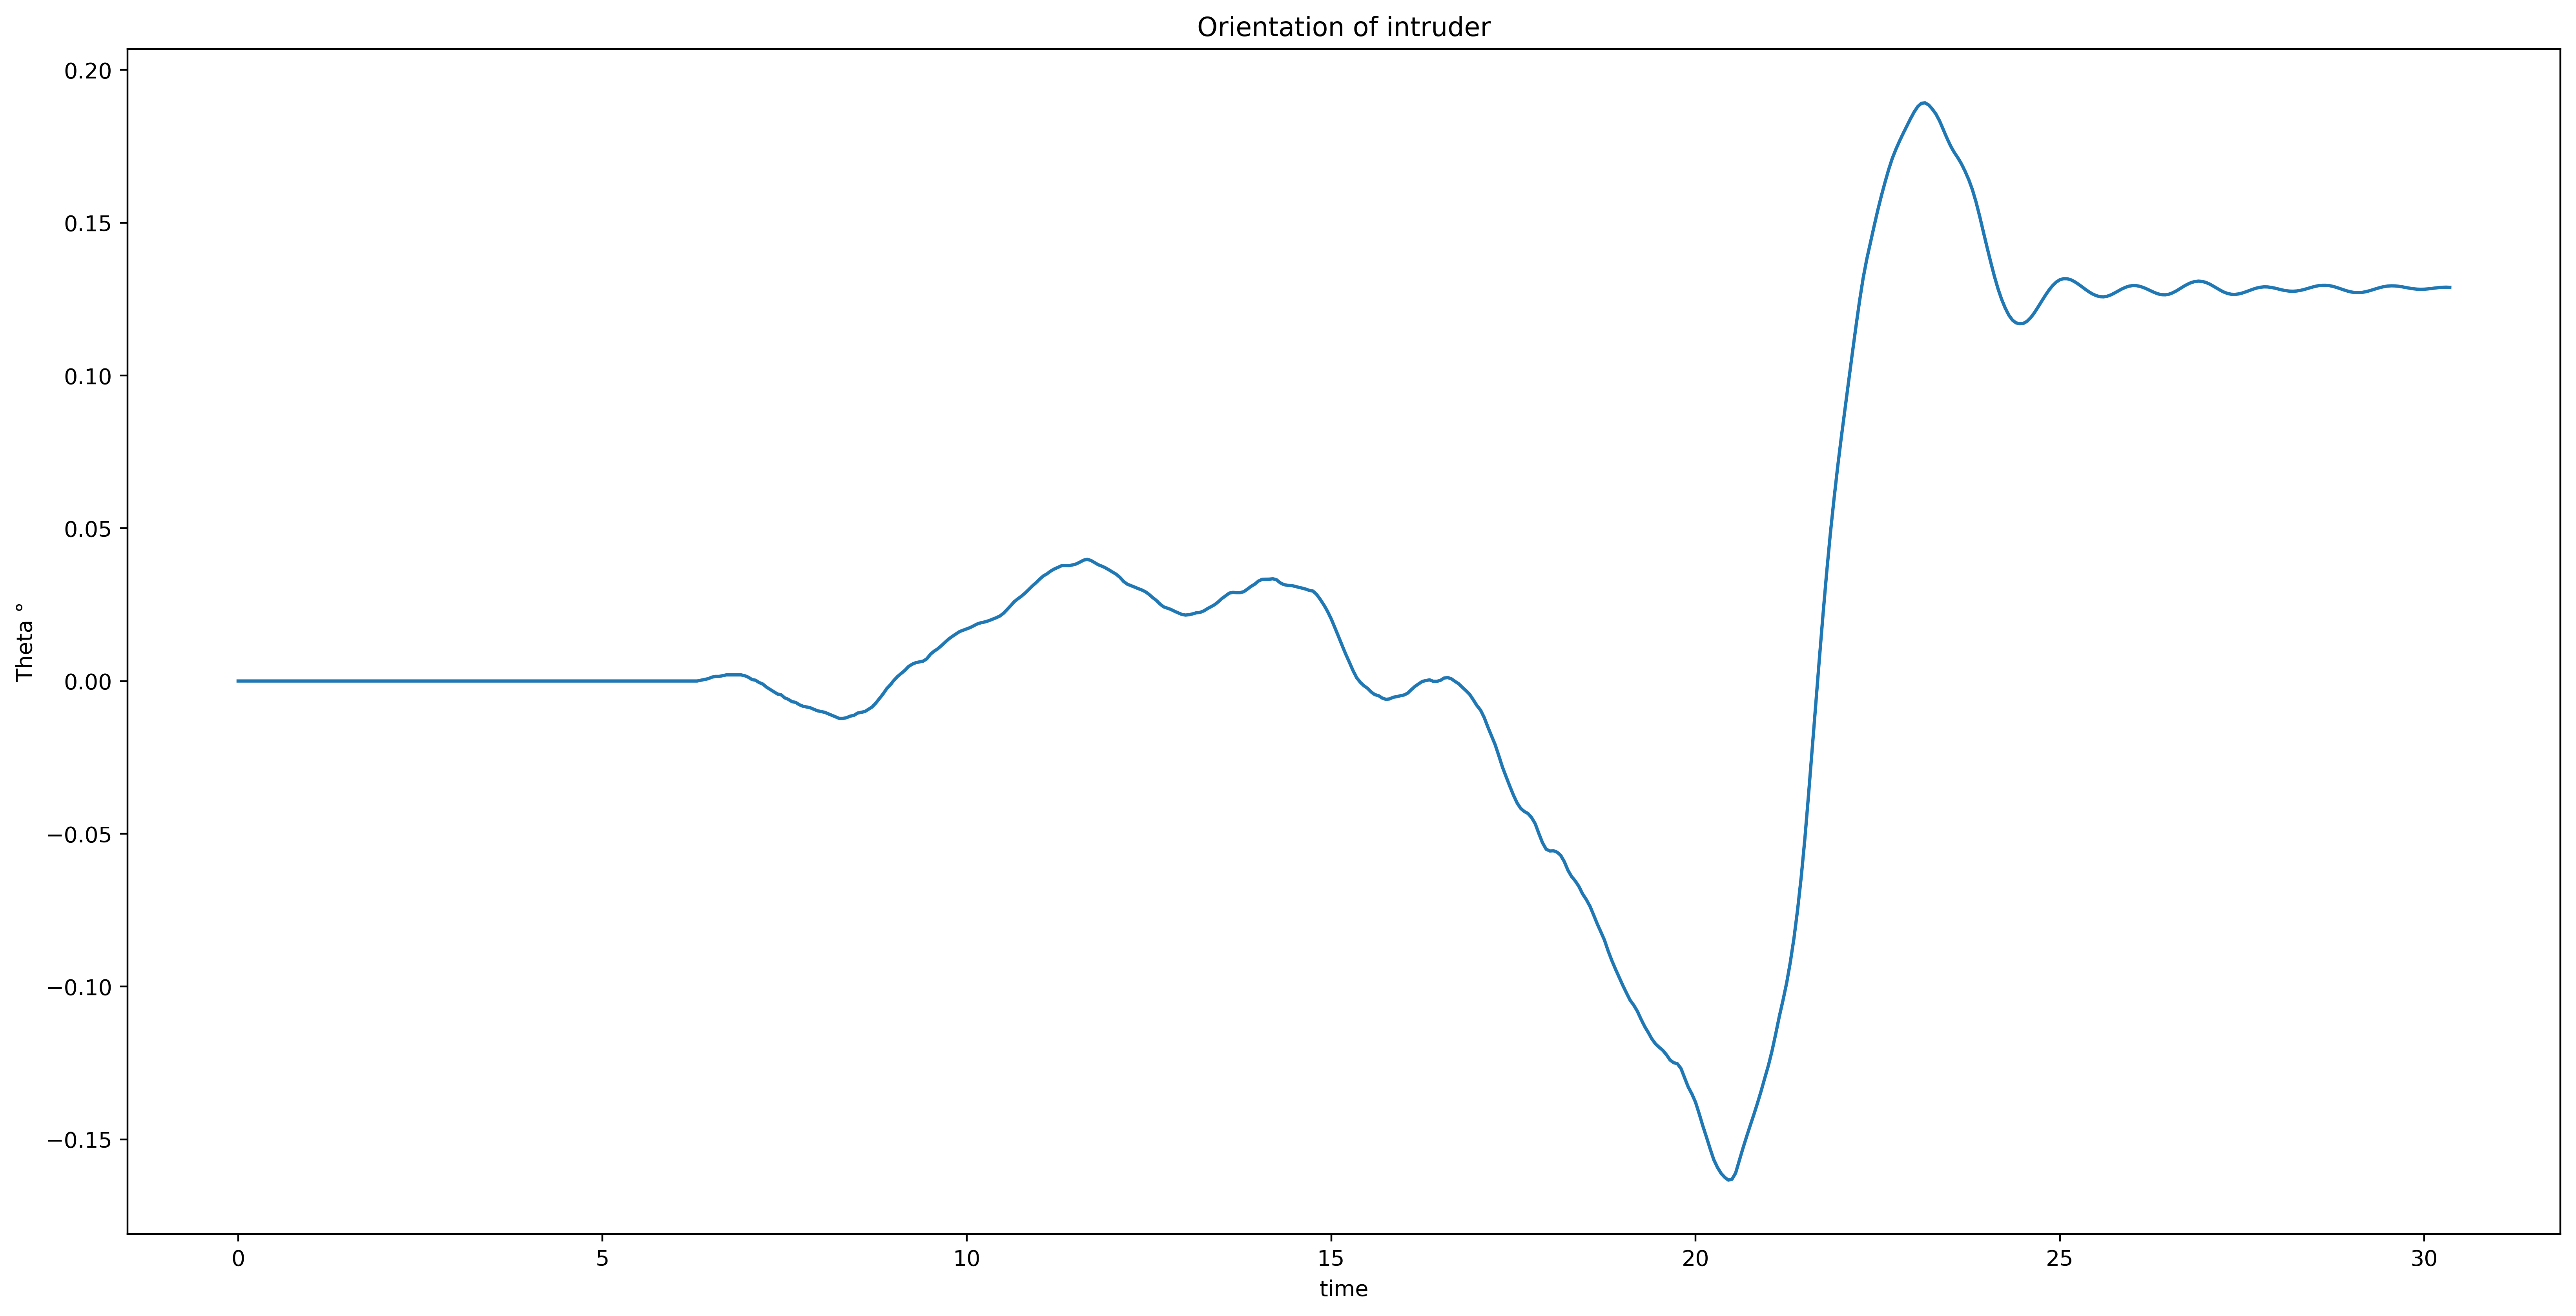

In [20]:
# theta Vs time
plt.figure(figsize=(20,10),dpi=400)
plt.plot(time_Arr,orientation)
plt.xlabel('time')
plt.ylabel('Theta °')
plt.title('Orientation of intruder')
plt.savefig('orientation.jpg',bbox_inches='tight')
plt.show()